#Random Forrest

For the second model, I am going to try using a random forrest to classify our data. The process of balancing the data with SMOTE will be repeated in this model.

**Note:** If you haven't seen the Logistic Regression model, I highly recommend taking a look at it as I go into an in depth explanation on why I should balance the data and use SMOTE.

In this notebook I won't explain anything I already explained in previous notebooks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


##Extract Data From Zip

In [15]:
from zipfile import ZipFile

zip_file_path = './processed_data_npy.zip'

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('./data/')


In [3]:
X_train = np.load('./data/X_train.npy', allow_pickle=True)
X_test = np.load('./data/X_test.npy', allow_pickle=True)
y_train = np.load('./data/y_train.npy', allow_pickle=True)
y_test = np.load('./data/y_test.npy', allow_pickle=True)

##Apply SMOTE

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

- Here we apply SMOTE in order to balance the data.

In [11]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

- Here, the model is defined and fit on the resampled data

In [12]:
y_predicted_smote = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted_smote)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9038674033149171


- General accuracy is higher compared to the Logistic regression model.


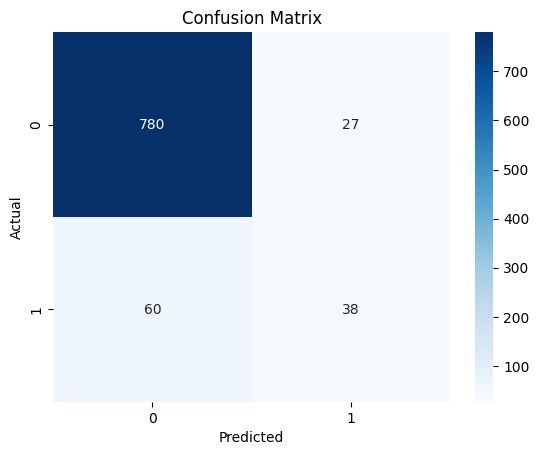

In [13]:
cm = confusion_matrix(y_test, y_predicted_smote)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
print(classification_report(y_test, y_predicted_smote))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       807
           1       0.58      0.39      0.47        98

    accuracy                           0.90       905
   macro avg       0.76      0.68      0.71       905
weighted avg       0.89      0.90      0.90       905




Let’s break down the results of your Random Forest model and what they tell us about its performance:

- Class 0 (Non-subscribers):
  - Precision (0.93):
    - Out of all predictions made as class 0, 93% were correct. This means the model is very accurate at identifying non-subscribers and makes relatively few false positives for this class.

  - Recall (0.97):
    - Out of all actual class 0 instances, the model correctly identified 97% of them. This high recall indicates that the model rarely misses non-subscribers (few false negatives for class 0).
  - F1-Score (0.95):
    - The F1-score is high because both precision and recall are high, meaning the model performs very well for non-subscribers.

- Class 1 (Subscribers)
  - Precision (0.58):
    - Out of all predictions made as class 1 (subscriber), only 58% were correct. This relatively low precision indicates that the model makes a significant number of false positives for class 1 (predicting someone will subscribe when they won’t).
  - Recall (0.39):
    - Out of all actual class 1 instances, the model only identified 39% correctly. This low recall suggests the model misses many actual subscribers (false negatives for class 1).
  - F1-Score (0.47):
    - The F1-score is low because both precision and recall for class 1 are relatively poor. This indicates that the model struggles to correctly classify subscribers.


Comparison To Logistic Regression:

1. Logistic Regression is Threshold-Sensitive

  Logistic Regression outputs probabilities, and by default, predictions are made using a threshold of 0.5.
  
  Logistic Regression may naturally assign higher probabilities to class 1 (minority class), especially if the dataset is balanced using techniques like SMOTE.

  The default behavior of Logistic Regression tends to favor capturing more true positives for the minority class (higher recall) at the cost of increased false positives (lower precision).

2. Random Forest Optimizes for Accuracy
  
  Random Forest works by averaging predictions from multiple decision trees, which are inherently biased towards the majority class when dealing with imbalanced data.
  
  Even with techniques like class weighting or SMOTE, Random Forest tends to prioritize classifying the majority class (class 0) correctly, as it has more examples to learn from.
  
  This can lead to lower recall for the minority class because the model is less aggressive about predicting the minority class to avoid false positives.
3. Bias-Variance Trade-off
  
  Logistic Regression is a simple, linear model that may generalize better for imbalanced datasets, especially when the decision boundary is relatively straightforward. This simplicity can sometimes result in better recall for the minority class.
  
  Random Forest is a more complex, high-variance model that focuses on splitting the data into smaller regions. If the minority class is underrepresented in many of these splits, the model might fail to predict it well, leading to lower recall for class 1.
4. Impact of Class Imbalance
  
  Logistic Regression: When combined with class weights or SMOTE, Logistic Regression tends to distribute the decision boundary in a way that maximizes true positives for both classes. This increases recall for the minority class.
  
  Random Forest: Even with SMOTE or class weighting, Random Forest may focus more on the majority class because it builds trees using subsets of the data. If many subsets contain few or no minority class examples, the trees won't learn patterns for class 1 effectively.

##Conclusion

1. If Class 1 (Subscribers) is More Important: Use Logistic Regression.
  - High recall (81%) for class 1 means it captures most actual subscribers, which is crucial if missing a possible subscriber (false negative) is a costly error. However, its low precision means there are many false positives, so additional steps like threshold tuning might be necessary.

2. If Class 0 (Non-Subscribers) is More Important: Use Random Forest.
  - It has better precision and recall for class 0 and overall higher accuracy. This is suitable if the goal is to avoid incorrectly identifying non-subscribers as subscribers (false positives for class 0).

3. If Balanced Performance Across Classes is Required: Consider Logistic Regression.

  - Logistic Regression has better macro recall (0.82 vs. 0.68 for RF) and slightly higher F1-score for class 1, indicating it’s more balanced between the two classes.


For a marketing Campaign I would recommend going for the **Logistic Regression model**. It may underpreform in terms of precision and accuracy but identifying a possible subscriber and contacting them is much more important (in context) than avoiding to contact possible non-subscribers.**bold text**

##Possible further Exploration:
Planning to try out new models and make more comparisons.